# Project Data MIning

# Problem: 1 Clustering

# A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

#importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv')
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [5]:
print(df.describe().T)
print('*'*60)
print(df.info())

                              count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
m

In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
df.isnull().sum().any()

False

In [8]:
df.shape

(210, 7)

In [9]:
df.duplicated().sum() 

0

# Question 1.1

# Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

# univariate

#As from the above table we can see that the MEAN, MEDIAN, MIN, MAX, STD for above 7 variables .

In [10]:
print('Minimum spending: ', df['spending'].min())
print('Maximum spending :',df['spending'].max())
print('Mean spending :',df['spending'].mean())
print('Median spending :',df['spending'].median())
print('STD spending :',df['spending'].std())

Minimum spending:  10.59
Maximum spending : 21.18
Mean spending : 14.847523809523818
Median spending : 14.355
STD spending : 2.909699430687361


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'spending'}, xlabel='spending'>

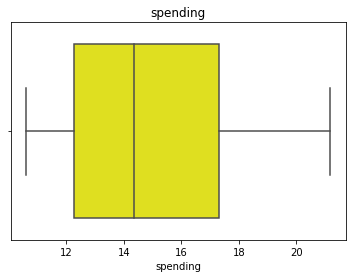

In [11]:
plt.title('spending')
sns.boxplot(df['spending'],orient='horizondal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


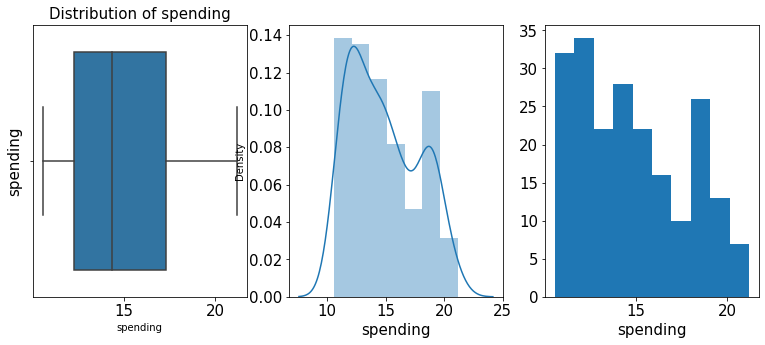

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=df,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

In [13]:
print('Minimum advance_payments: ', df['advance_payments'].min())
print('Maximum advance_payments :',df['advance_payments'].max())
print('Mean advance_payments :',df['advance_payments'].mean())
print('Median advance_payments :',df['advance_payments'].median())
print('STD advance_payments :',df['advance_payments'].std())

Minimum advance_payments:  12.41
Maximum advance_payments : 17.25
Mean advance_payments : 14.559285714285727
Median advance_payments : 14.32
STD advance_payments : 1.305958726564022


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'advance_payments'}, xlabel='advance_payments'>

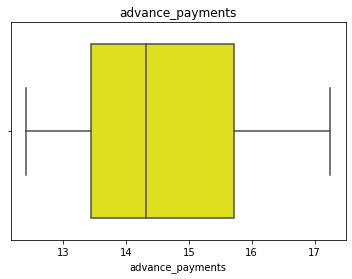

In [14]:
plt.title('advance_payments')
sns.boxplot(df['advance_payments'],orient='horizondal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


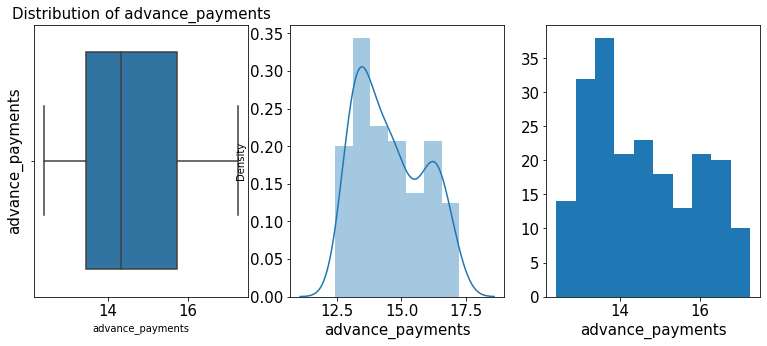

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=df,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

In [16]:
print('Minimum probability_of_full_payment: ', df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment :',df['probability_of_full_payment'].max())
print('Mean probability_of_full_payment :',df['probability_of_full_payment'].mean())
print('Median probability_of_full_payment :',df['probability_of_full_payment'].median())
print('STD probability_of_full_payment :',df['probability_of_full_payment'].std())

Minimum probability_of_full_payment:  0.8081
Maximum probability_of_full_payment : 0.9183
Mean probability_of_full_payment : 0.8709985714285714
Median probability_of_full_payment : 0.8734500000000001
STD probability_of_full_payment : 0.0236294165838465


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

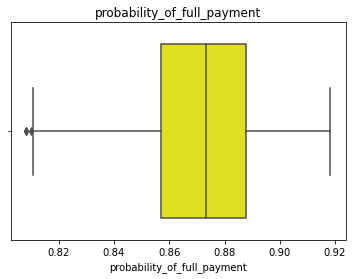

In [17]:
plt.title('probability_of_full_payment')
sns.boxplot(df['probability_of_full_payment'],orient='horizontal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


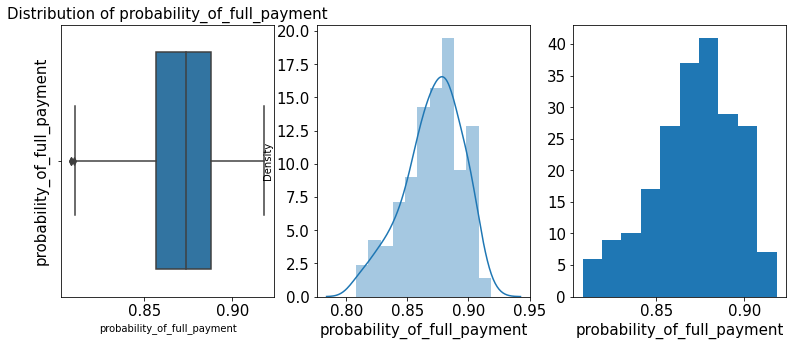

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

In [19]:
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance :',df['current_balance'].max())
print('Mean current_balance :',df['current_balance'].mean())
print('Median current_balance :',df['current_balance'].median())
print('STD current_balance :',df['current_balance'].std())

Minimum current_balance:  4.899
Maximum current_balance : 6.675
Mean current_balance : 5.628533333333335
Median current_balance : 5.5235
STD current_balance : 0.44306347772644944


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'current_balance'}, xlabel='current_balance'>

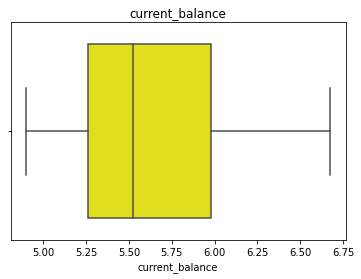

In [20]:
plt.title('current_balance')
sns.boxplot(df['current_balance'],orient='horizontal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


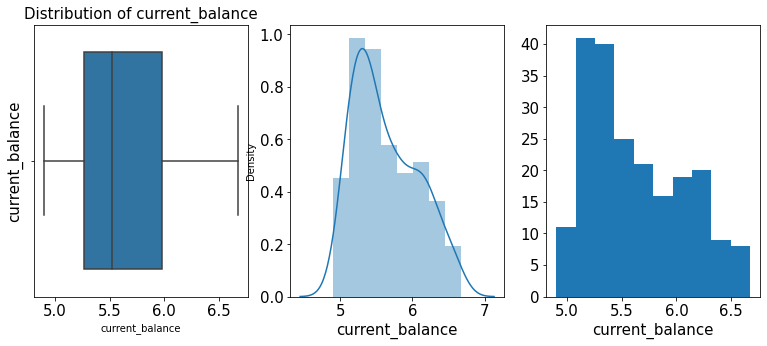

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

In [22]:
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit :',df['credit_limit'].max())
print('Mean credit_limit :',df['credit_limit'].mean())
print('Median credit_limit :',df['credit_limit'].median())
print('STD credit_limit :',df['credit_limit'].std())

Minimum credit_limit:  2.63
Maximum credit_limit : 4.033
Mean credit_limit : 3.258604761904763
Median credit_limit : 3.237
STD credit_limit : 0.37771444490658734


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'credit_limit'}, xlabel='credit_limit'>

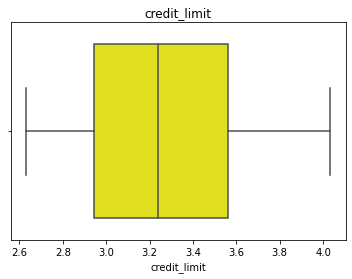

In [23]:
plt.title('credit_limit')
sns.boxplot(df['credit_limit'],orient='horizontal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


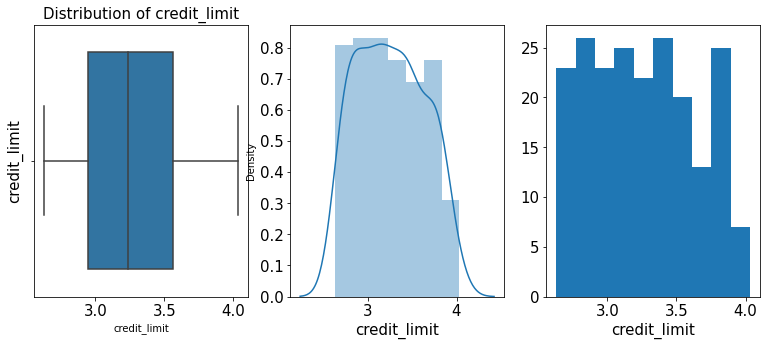

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

In [25]:
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt :',df['min_payment_amt'].max())
print('Mean min_payment_amt :',df['min_payment_amt'].mean())
print('Median min_payment_amt :',df['min_payment_amt'].median())
print('STD min_payment_amt :',df['min_payment_amt'].std())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt : 8.456
Mean min_payment_amt : 3.7002009523809503
Median min_payment_amt : 3.599
STD min_payment_amt : 1.5035571308217792


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

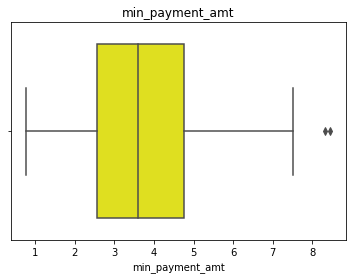

In [26]:
plt.title('min_payment_amt')
sns.boxplot(df['min_payment_amt'],orient='horizontal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


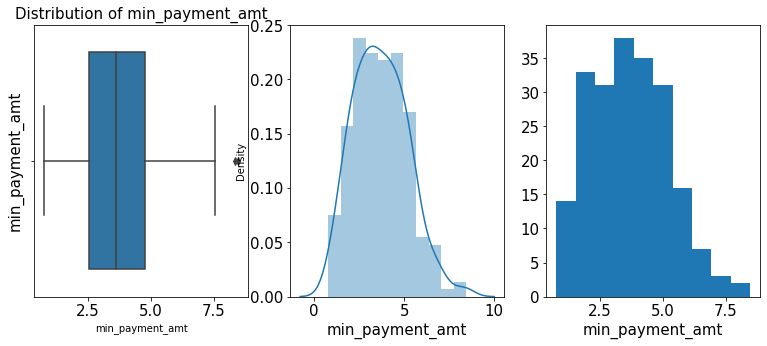

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

In [28]:
print('Minimum max_spent_in_single_shopping: ', df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shopping :',df['max_spent_in_single_shopping'].max())
print('Mean max_spent_in_single_shopping :',df['max_spent_in_single_shopping'].mean())
print('Median max_spent_in_single_shopping :',df['max_spent_in_single_shopping'].median())
print('STD max_spent_in_single_shopping :',df['max_spent_in_single_shopping'].std())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shopping : 6.55
Mean max_spent_in_single_shopping : 5.408071428571429
Median max_spent_in_single_shopping : 5.223000000000001
STD max_spent_in_single_shopping : 0.49148049910240543


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'max_spent_in_single_shopping'}, xlabel='max_spent_in_single_shopping'>

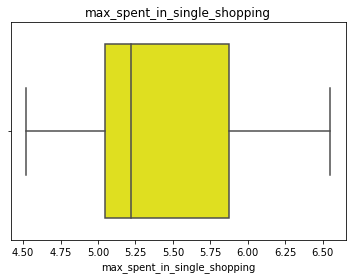

In [29]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(df['max_spent_in_single_shopping'],orient='horizontal',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


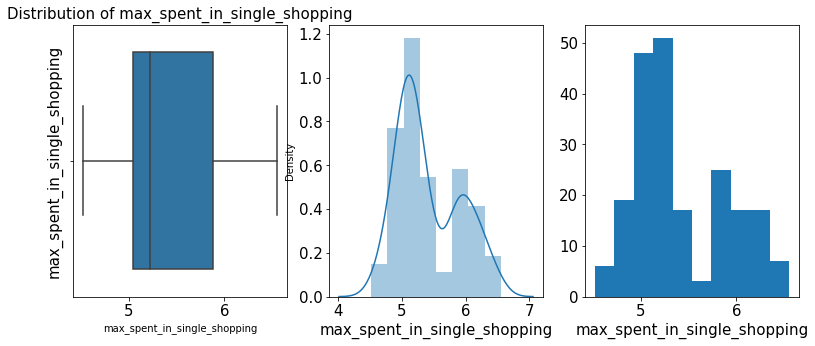

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'current_balance'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

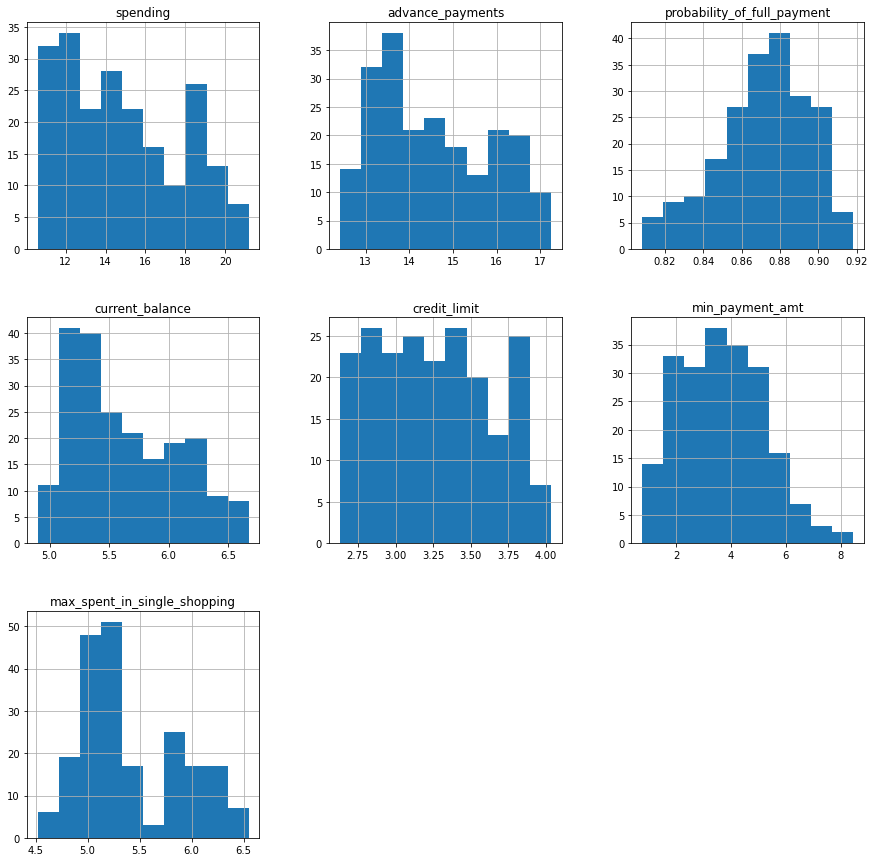

In [31]:
df.hist(figsize=(15,15))

In [32]:
df.skew().sort_values(ascending=True)

probability_of_full_payment    -0.537954
credit_limit                    0.134378
advance_payments                0.386573
spending                        0.399889
min_payment_amt                 0.401667
current_balance                 0.525482
max_spent_in_single_shopping    0.561897
dtype: float64

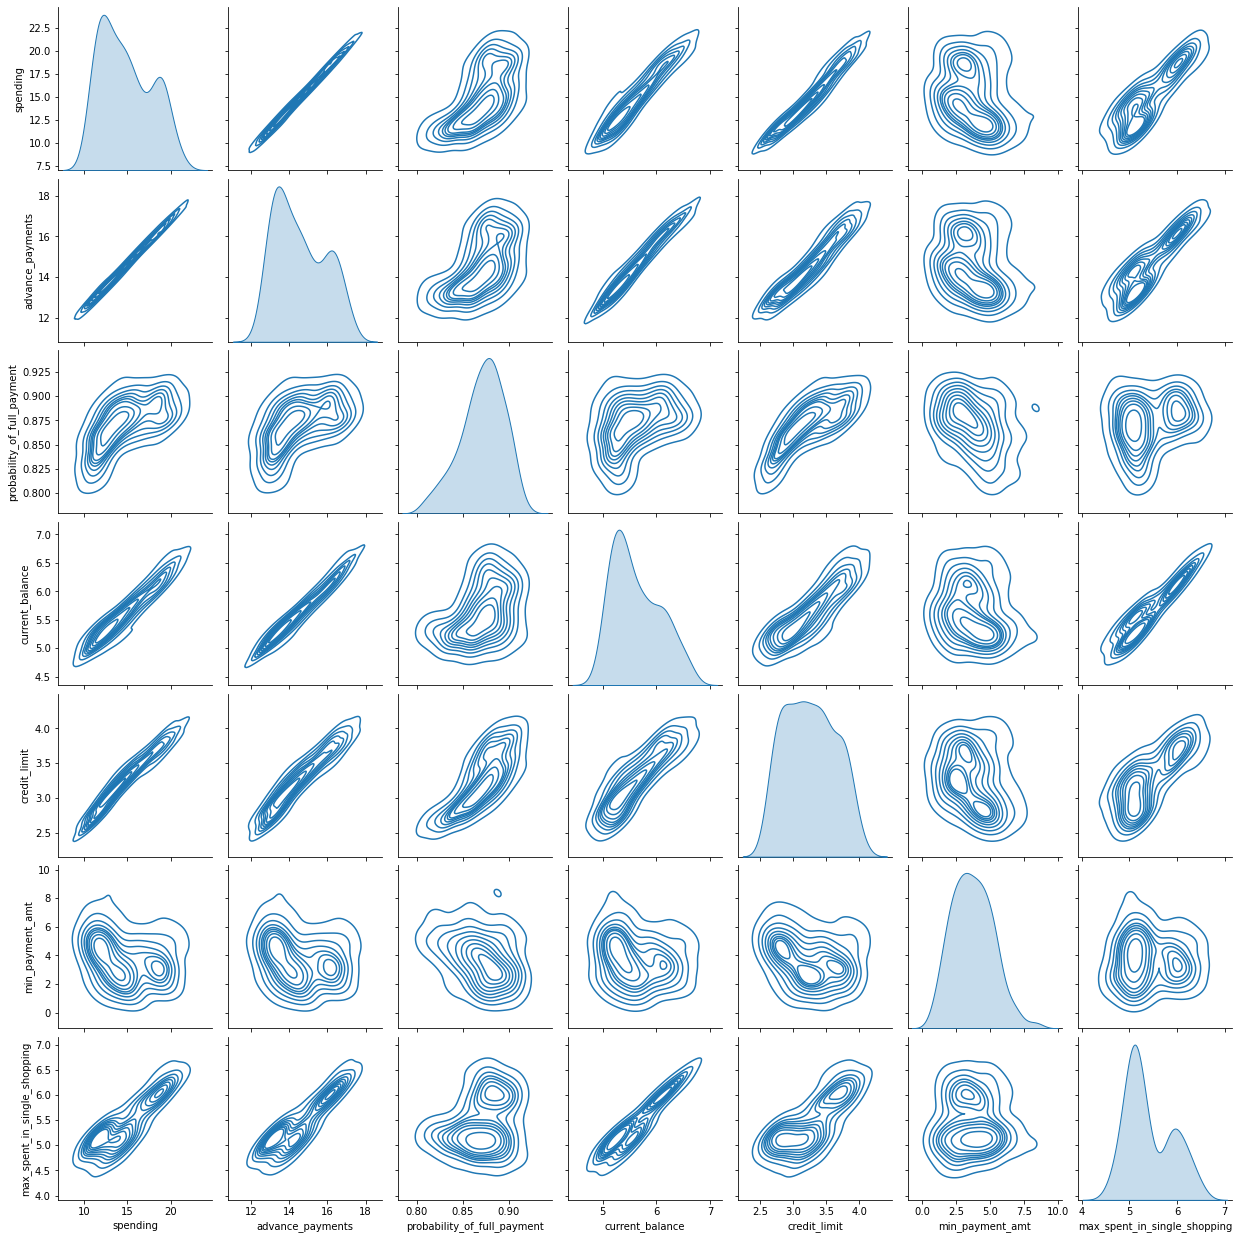

In [33]:
sns.pairplot(df,kind='kde')

# Bivariate analysis

#Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables (X, Y), for the purpose of determining the empirical relationship between them.It is the analysis of the relationship between the two variables.

#There are three common ways to perform bivariate analysis:

In [34]:
plt.scatter(df.spending,df.advance_payment,df.probability_of_full_payment,df.current_balance,df.credit_limit,df.min_payment_amt,df.max_spent_in_single_shopping)
plt.title('spending','advance_payment','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping')
plt.xlabel('spending','advance_payment','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping')

AttributeError: 'DataFrame' object has no attribute 'advance_payment'

In [35]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


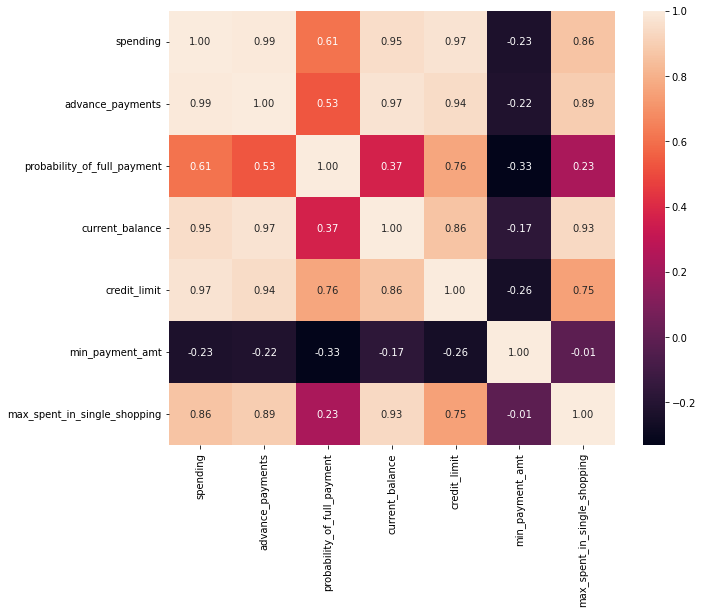

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [ ]:
# from above as we can see the correlation between spending and advance payment is 0.99.
# correlation between spending and probability of full payment is 0.61.
# correlation between spending and current balance is 0.95
# correlation between spending and credit limit is 0.97.
# correlation between spending and min payment amt is -0.23.
# correlation between spending and max spent in single shopping is 0.86.

# correlation between advance payment and probability of full payment is 0.53.
# correlation between advance payment and current balance is 0.97.
# correlation between advance payment and credit limit is 0.94.
# correlation between advance payment and min payment amt is -0.22
# correlation between advance payment and max spent in single shopping is 0.89

# 

In [37]:
dff=df.copy()

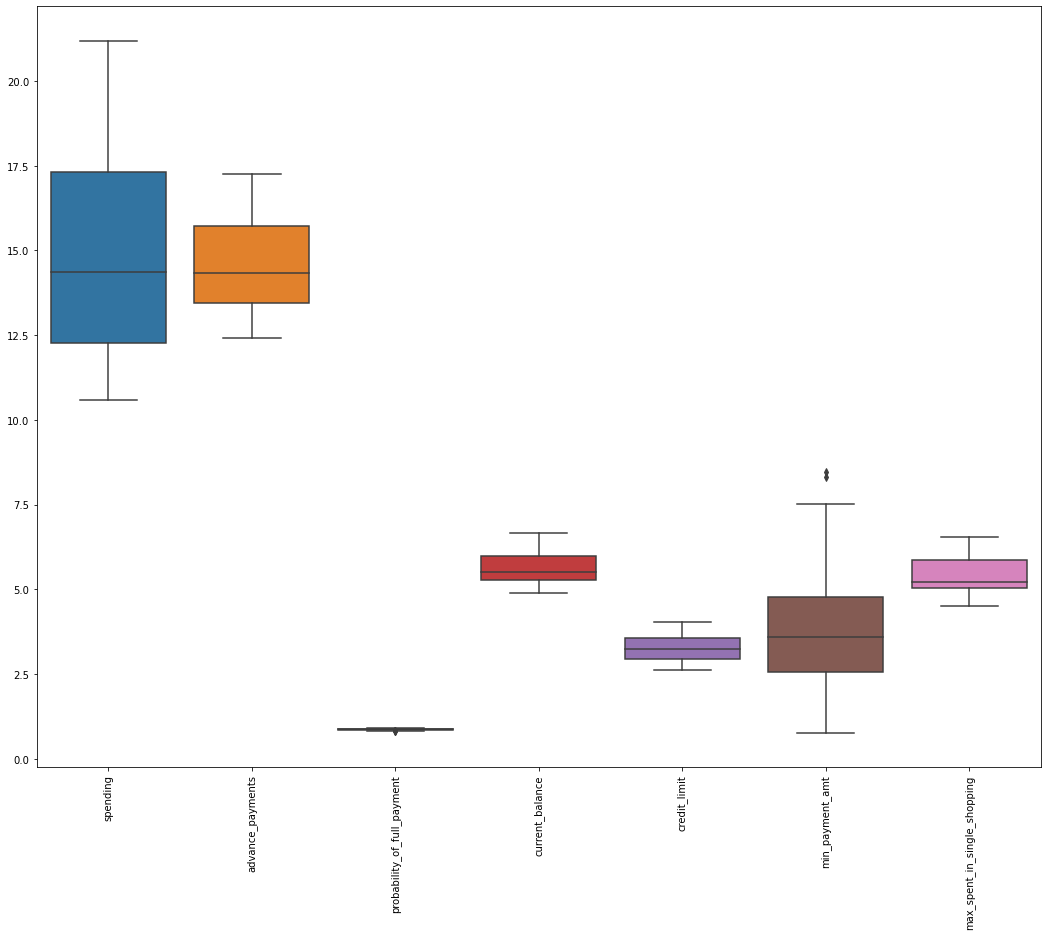

In [38]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=dff)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

# As from the above table we can see that we have 2 outliers 
# 1) probability_of_full_payment
# 2) min_payment_amt

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

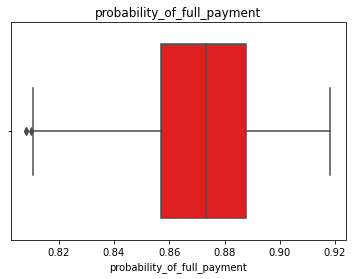

In [39]:
plt.title('probability_of_full_payment')
sns.boxplot(dff['probability_of_full_payment'],orient='horizontal',color='red')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

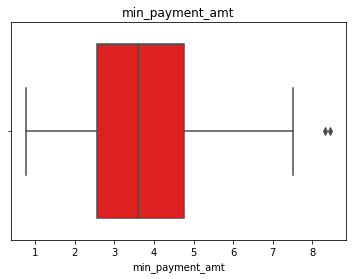

In [40]:
plt.title('min_payment_amt')
sns.boxplot(dff['min_payment_amt'],orient='horizontal',color='red')

# Question 1.2

# Do you think scaling is necessary for clustering in this case? Justify

In [ ]:
# Yes. Clustering algorithms such as K-means do need feature scaling before they are fed to the algo.
# scaling needs to be done as the values of the variables are different.
# after scaling we will have all the values in the relative same range.
# I have used zscore to standarised the data to relative same scale -3 to +3.

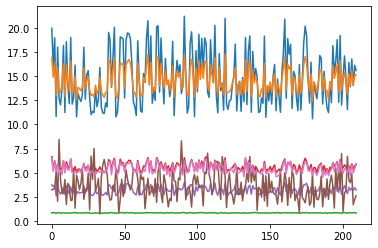

In [41]:
plt.plot(dff)
plt.show()

In [42]:
from scipy.stats import zscore

In [43]:
data=df.apply(zscore)
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


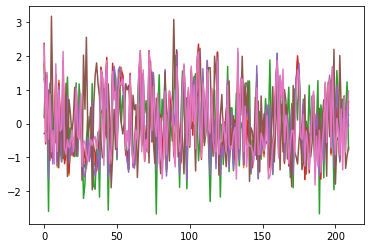

In [44]:
plt.plot(data)
plt.show()

# Question 1.3

# Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
link_method = linkage(data, method = 'average')

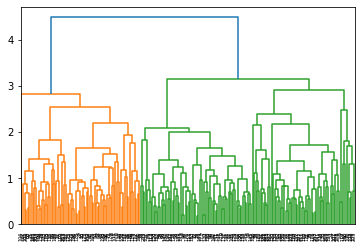

In [47]:
dend = dendrogram(link_method)

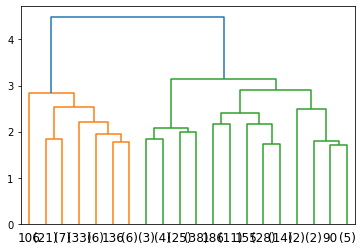

In [48]:
dend = dendrogram(link_method,truncate_mode='lastp',p=20)

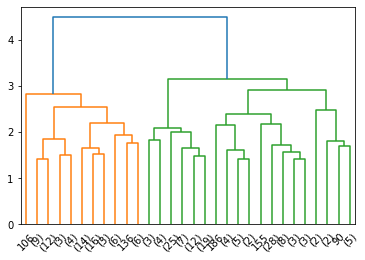

In [49]:
dend = dendrogram(link_method,truncate_mode='lastp',p=30)

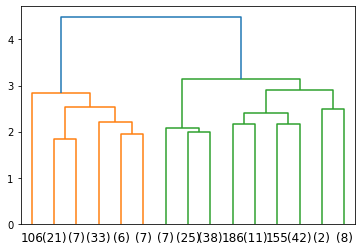

In [50]:
dend = dendrogram(link_method,truncate_mode='lastp',p=15)

In [51]:
from scipy.cluster.hierarchy import fcluster

In [52]:
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [53]:
cluster3_data=df.copy()

In [54]:
cluster3_data['clusters-3'] = clusters_3

In [55]:
cluster3_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [56]:
aggdata=cluster3_data.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_data['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [ ]:
# as we can see from the above table that for value 1 there are atotal 75 number of count
# for 2 we have total 70 number of count and for 3 we have 65 number of count.


# Question 1.4

# Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [57]:
from sklearn.cluster import KMeans 

In [58]:
k_means = KMeans(n_clusters = 1)
k_means.fit(data)
k_means.inertia_

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1469.9999999999995

In [59]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data)
k_means.inertia_

659.1717544870411

In [60]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data)
k_means.inertia_

430.65897315130064

In [61]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data)
k_means.inertia_

371.6531439995162

In [62]:
wss=[]  

In [63]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data)
    wss.append(KM.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 326.36254154106956,
 289.46717056412893,
 262.3445504777467,
 241.92009469832294,
 221.569390877319,
 209.28295981087177]

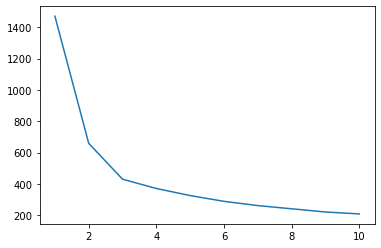

In [65]:
plt.plot(range(1,11),wss) 

In [66]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(data)
labels_4 = k_means_4.labels_

In [67]:
kmeans4_dataset=df.copy()

In [68]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [69]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [70]:
silhouette_score(data,labels_4)

0.3347542296283262

In [71]:
silhouette_samples(data,labels_4)

array([ 4.72459898e-01,  5.36652637e-02,  4.94127371e-01,  5.33637257e-01,
        1.52686050e-01,  2.34941508e-01,  4.72104986e-01,  4.35787998e-01,
        2.65426327e-01,  5.09484040e-01,  3.11333104e-01,  4.40049096e-02,
        3.80469250e-01,  3.84889924e-01,  2.69597441e-01,  1.83848163e-01,
        1.29400208e-01,  4.71941919e-01,  5.86913951e-03,  2.01039060e-01,
        2.95623878e-01,  3.95938728e-01,  2.24937886e-01,  2.23852949e-01,
        1.21410307e-01,  4.51665132e-01,  3.93832703e-01,  5.33898611e-01,
        5.61772416e-01,  4.46650270e-01,  4.40534970e-01,  3.72882000e-01,
        3.73628032e-01,  2.26351415e-01,  5.52414481e-01,  5.84695490e-01,
        5.14887114e-01,  4.22719874e-01,  5.34279492e-01,  5.19629801e-01,
        4.15379157e-01,  4.69103841e-01,  1.70669590e-01,  5.28858661e-01,
        5.37382822e-01,  2.86760740e-01,  3.92074967e-01,  4.82260696e-01,
        2.70382701e-01,  3.67881765e-01,  2.80636751e-01,  1.98019629e-01,
        4.20707965e-01,  

In [72]:
silhouette_samples(data,labels_4).min()

-0.020412913640457993

In [73]:
silhouette_samples(data,labels_4).max()

0.60681681919254

In [74]:
from sklearn import metrics

In [75]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(data)
    scores.append(metrics.silhouette_score(data, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282168,
 0.2666366921192433,
 0.2731288488219916]

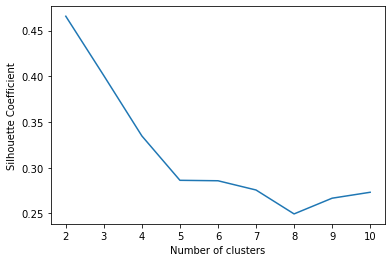

In [76]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [77]:
# the optimal cluster should be 3 or 4 

In [78]:
sil_width = silhouette_samples(data,labels_4)

In [79]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.472460
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.053665
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.494127
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.533637
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.152686


In [80]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [81]:
km_3.fit(data)
km_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [82]:
pd.Series(km_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

In [83]:
kmeans1_dataset=df.copy()

In [84]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [85]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


# Going with 3 clusters via kmeans but showing the analysis of 4 and 5 Kmeans cluster .

# cluster 4

In [86]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [87]:
km_4.fit(data)
km_4.labels_

array([0, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 2, 1, 0, 3, 1, 3, 1, 3, 1, 1, 1,
       0, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 3, 2, 0,
       1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 3, 1, 1, 2, 3, 0,
       0, 3, 0, 3, 3, 1, 0, 0, 1, 0, 3, 1, 2, 3, 3, 3, 3, 0, 1, 2, 2, 2,
       2, 1, 3, 0, 3, 1, 3, 0, 0, 2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 0,
       2, 3, 0, 1, 1, 2, 3, 2, 1, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 3, 1, 3,
       3, 0, 1, 0, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2,
       3, 3, 3, 1, 3, 0, 0, 1, 0, 2, 0, 1, 2, 3, 3, 1, 3, 1, 3, 0, 0, 0,
       3, 3, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 0, 3, 2, 0, 1,
       0, 1, 3, 2, 3, 1, 2, 3, 2, 3, 2, 2])

In [88]:
pd.Series(km_4.labels_).value_counts()

3    65
1    64
0    51
2    30
dtype: int64

In [89]:
kmeans14_dataset=df.copy()

In [90]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans14_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans14_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,19.1,16.4,0.9,6.3,3.8,3.5,6.1
2,11.9,13.3,0.8,5.2,2.8,4.9,5.1
3,16.1,15.2,0.9,5.8,3.4,4.0,5.6
4,14.1,14.1,0.9,5.4,3.2,2.4,5.0


In [91]:
cluster_4_T = kmeans_mean_cluster.T
cluster_4_T

cluster,1,2,3,4
spending,19.1,11.9,16.1,14.1
advance_payments,16.4,13.3,15.2,14.1
probability_of_full_payment,0.9,0.8,0.9,0.9
current_balance,6.3,5.2,5.8,5.4
credit_limit,3.8,2.8,3.4,3.2
min_payment_amt,3.5,4.9,4.0,2.4
max_spent_in_single_shopping,6.1,5.1,5.6,5.0


# cluster 5

In [92]:
km_5 = KMeans(n_clusters=5,random_state=123)

In [93]:
km_5.fit(data)
km_5.labels_

array([1, 0, 1, 4, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 4,
       1, 2, 0, 3, 0, 4, 4, 4, 0, 2, 2, 0, 4, 4, 4, 2, 4, 1, 1, 0, 3, 1,
       4, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 4, 4, 1, 0, 2, 4, 3, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 4, 3, 0, 0, 0, 0, 1, 4, 3, 3, 3,
       3, 2, 0, 1, 0, 4, 2, 1, 1, 3, 4, 3, 2, 1, 0, 1, 0, 1, 1, 4, 2, 1,
       3, 0, 1, 4, 4, 3, 0, 2, 4, 1, 2, 4, 2, 2, 0, 0, 1, 4, 0, 0, 4, 0,
       2, 1, 4, 3, 1, 2, 3, 0, 3, 0, 4, 2, 2, 2, 1, 4, 0, 4, 0, 2, 0, 3,
       2, 0, 2, 4, 0, 3, 1, 2, 1, 3, 1, 2, 3, 0, 0, 2, 0, 4, 0, 1, 1, 1,
       0, 2, 3, 2, 0, 2, 0, 0, 3, 3, 2, 3, 0, 4, 2, 0, 4, 1, 0, 3, 1, 2,
       1, 4, 0, 3, 0, 4, 3, 0, 3, 0, 0, 3])

In [94]:
kmeans15_dataset=df.copy()

In [95]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans15_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans15_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,11.6,13.2,0.8,5.3,2.8,4.7,5.2
2,19.1,16.4,0.9,6.3,3.8,3.5,6.1
3,14.2,14.2,0.9,5.5,3.2,2.3,5.0
4,12.3,13.3,0.9,5.2,3.0,5.0,5.0
5,16.2,15.2,0.9,5.9,3.4,3.9,5.7


In [96]:
cluster_5_T = kmeans_mean_cluster.T
cluster_5_T

cluster,1,2,3,4,5
spending,11.6,19.1,14.2,12.3,16.2
advance_payments,13.2,16.4,14.2,13.3,15.2
probability_of_full_payment,0.8,0.9,0.9,0.9,0.9
current_balance,5.3,6.3,5.5,5.2,5.9
credit_limit,2.8,3.8,3.2,3.0,3.4
min_payment_amt,4.7,3.5,2.3,5.0,3.9
max_spent_in_single_shopping,5.2,6.1,5.0,5.0,5.7


# Question 1.5

#  Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

# 3 groups clusters via Kmeans

In [97]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


# 3 group cluster via hierarchical clustering

In [98]:
aggdata.T


clusters-3,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


# Cluster Group Profiles

# Group 1 : High Spending
# Group 3 : Medium Spending
# Group 2 : Low Spending


# Problem 2: CART-RF-ANN

# An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

# importing important libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [100]:
harish=pd.read_csv('insurance_part2_data-2.csv')
harish.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [101]:
harish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [102]:
harish.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [103]:
harish.shape

(3000, 10)

In [104]:
harish.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [105]:
harish.isnull().any()

Age             False
Agency_Code     False
Type            False
Claimed         False
Commision       False
Channel         False
Duration        False
Sales           False
Product Name    False
Destination     False
dtype: bool

In [106]:
harish.duplicated().sum()

139

In [107]:
df = harish.duplicated()
harish[df]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [108]:
harish.value_counts()

Age  Agency_Code  Type           Claimed  Commision  Channel  Duration  Sales  Product Name       Destination
36   EPX          Travel Agency  No       0.00       Online   5         20.0   Customised Plan    ASIA           7
                                                              3         10.0   Cancellation Plan  ASIA           7
                                                              8         20.0   Customised Plan    ASIA           7
                                                              2         20.0   Customised Plan    ASIA           7
                                                              5         10.0   Cancellation Plan  ASIA           7
                                                                                                                ..
35   EPX          Travel Agency  No       0.00       Online   19        69.0   Customised Plan    ASIA           1
                                                              24        55.0   Cancel

# Question 2.1

# Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

# Univariate analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functi

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:261

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316

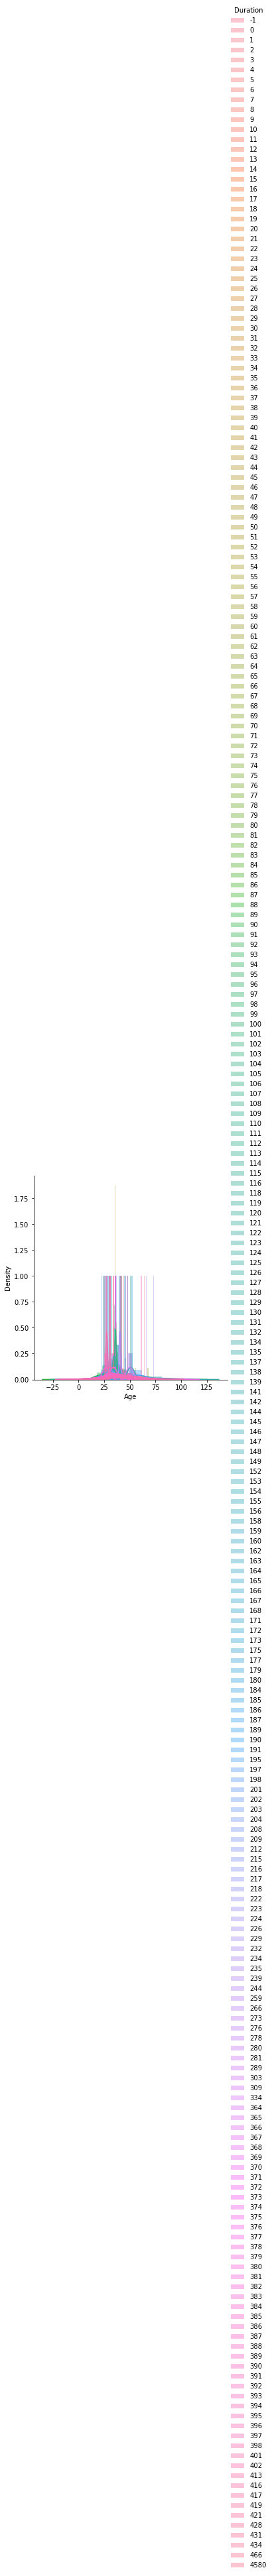

In [109]:
sns.FacetGrid(harish,hue='Duration',size=5).map(sns.distplot,'Age').add_legend()

In [110]:
for column in harish[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',harish[column].nunique())
    print(harish[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# Age variable

In [111]:
print('Minimum Age: ', harish['Age'].min())
print('Maximum Age: ',harish['Age'].max())
print('Mean value: ', harish['Age'].mean())
print('Median value: ',harish['Age'].median())
print('Standard deviation: ', harish['Age'].std())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944


In [112]:
Q1=harish['Age'].quantile(q=0.25)
Q3=harish['Age'].quantile(q=0.75)
print('1st Quartile: ', Q1)
print('3st Quartile: ', Q3)
print('IQR', stats.iqr(harish['Age']))

1st Quartile:  32.0
3st Quartile:  42.0
IQR 10.0


In [113]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  17.0
Upper outliers:  57.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

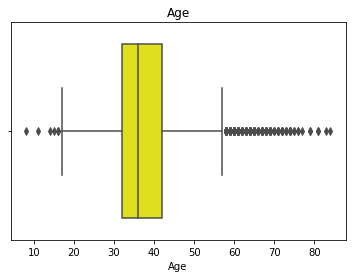

In [114]:
# box plot for Age
plt.title('Age')
sns.boxplot(harish['Age'],orient='verticle',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


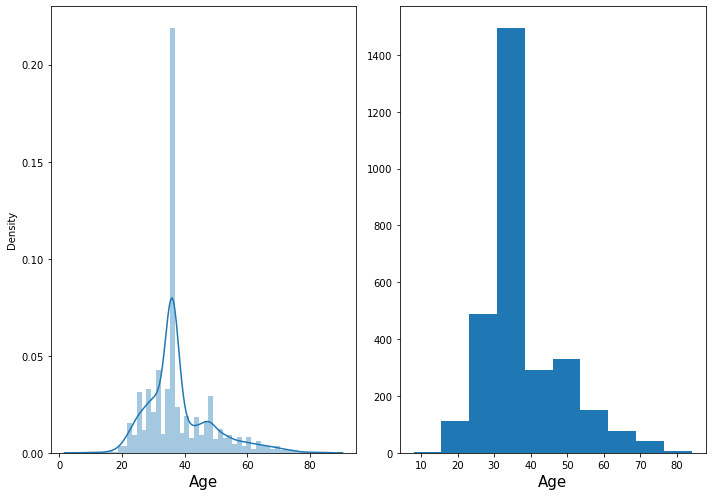

In [115]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(10,7))

sns.distplot(harish['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)

ax3.hist(harish['Age'])
ax3.set_xlabel('Age', fontsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [116]:
harish.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# Commision variable

In [117]:
print('Minimum Commision: ', harish['Commision'].min())
print('Maximum Commision: ',harish['Commision'].max())
print('Mean Commision: ', harish['Commision'].mean())
print('Median Commision: ',harish['Commision'].median())
print('Standard deviation: ', harish['Commision'].std())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean Commision:  14.529203333333266
Median Commision:  4.63
Standard deviation:  25.48145450662553


In [118]:
Q1=harish['Commision'].quantile(q=0.25)
Q3=harish['Commision'].quantile(q=0.75)
print('1st Quartile is:',Q1)
print('3rd Quartile is:',Q3)
print('IQR', stats.iqr(harish['Commision']))

1st Quartile is: 0.0
3rd Quartile is: 17.235
IQR 17.235


In [119]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  -25.8525
Upper outliers:  43.0875


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Commision'}, xlabel='Commision'>

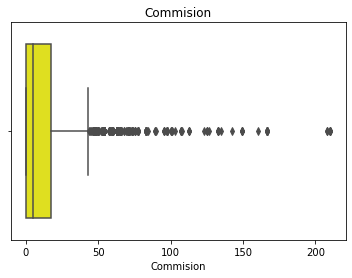

In [120]:
# box plot for Commision
plt.title('Commision')
sns.boxplot(harish['Commision'],orient='verticle',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


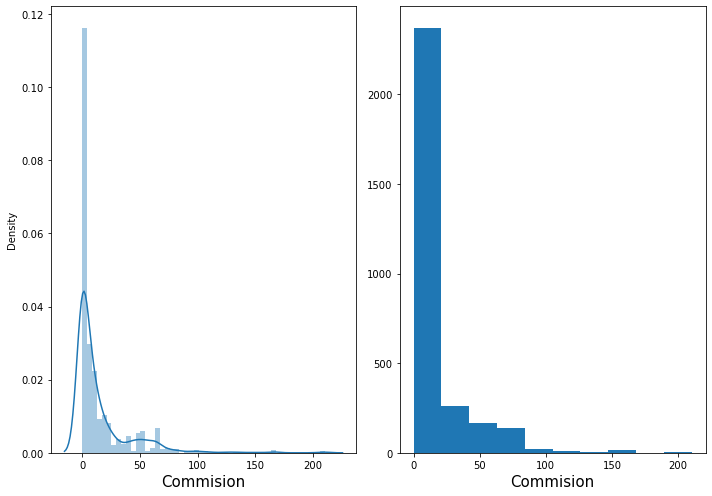

In [121]:
fig, (ax4,ax5)=plt.subplots(1,2,figsize=(10,7))

sns.distplot(harish['Commision'],ax=ax4)
ax4.set_xlabel('Commision', fontsize=15)

ax5.hist(harish['Commision'])
ax5.set_xlabel('Commision', fontsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Duration variable

In [122]:
print('Minimum Duration: ', harish['Duration'].min())
print('Maximum Duration: ',harish['Duration'].max())
print('Mean Duration: ', harish['Duration'].mean())
print('Median Duration: ',harish['Duration'].median())
print('Standard Duration: ', harish['Duration'].std())

Minimum Duration:  -1
Maximum Duration:  4580
Mean Duration:  70.00133333333333
Median Duration:  26.5
Standard Duration:  134.05331313253495


In [123]:
Q1=harish['Duration'].quantile(q=0.25)
Q3=harish['Duration'].quantile(q=0.75)
print('1st Quartile is:',Q1)
print('3rd Quartile is:',Q3)
print('IQR', stats.iqr(harish['Duration']))

1st Quartile is: 11.0
3rd Quartile is: 63.0
IQR 52.0


In [124]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  -67.0
Upper outliers:  141.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Duration'}, xlabel='Duration'>

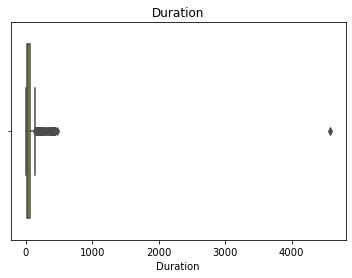

In [125]:
# box plot for Duration
plt.title('Duration')
sns.boxplot(harish['Duration'],orient='verticle',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


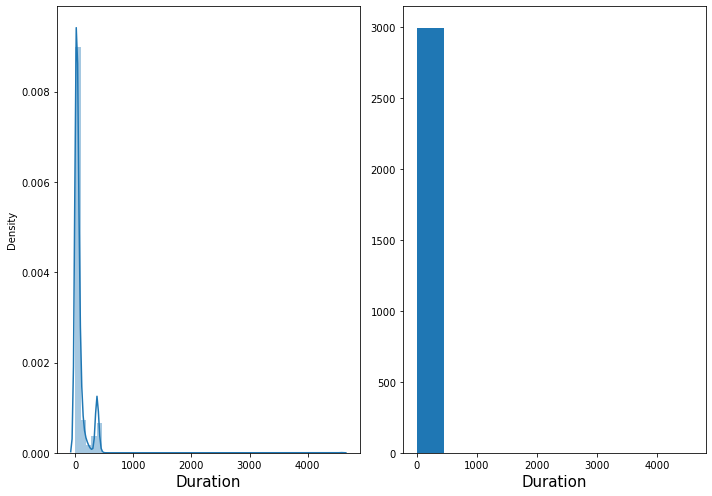

In [126]:
fig, (ax4,ax5)=plt.subplots(1,2,figsize=(10,7))

sns.distplot(harish['Duration'],ax=ax4)
ax4.set_xlabel('Duration', fontsize=15)

ax5.hist(harish['Duration'])
ax5.set_xlabel('Duration', fontsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Sales variable

In [127]:
print('Minimum Sales: ', harish['Sales'].min())
print('Maximum Sales: ',harish['Sales'].max())
print('Mean Sales: ', harish['Sales'].mean())
print('Median Sales: ',harish['Sales'].median())
print('Standard Sales: ', harish['Sales'].std())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean Sales:  60.24991333333344
Median Sales:  33.0
Standard Sales:  70.73395353143047


In [128]:
Q1=harish['Sales'].quantile(q=0.25)
Q3=harish['Sales'].quantile(q=0.75)
print('1st Quartile is:',Q1)
print('3rd Quartile is:',Q3)
print('IQR', stats.iqr(harish['Sales']))

1st Quartile is: 20.0
3rd Quartile is: 69.0
IQR 49.0


In [129]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  -53.5
Upper outliers:  142.5


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'Sales'}, xlabel='Sales'>

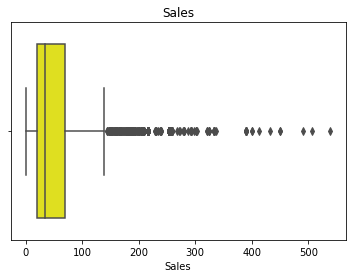

In [130]:
# box plot for Duration
plt.title('Sales')
sns.boxplot(harish['Sales'],orient='verticle',color='yellow')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


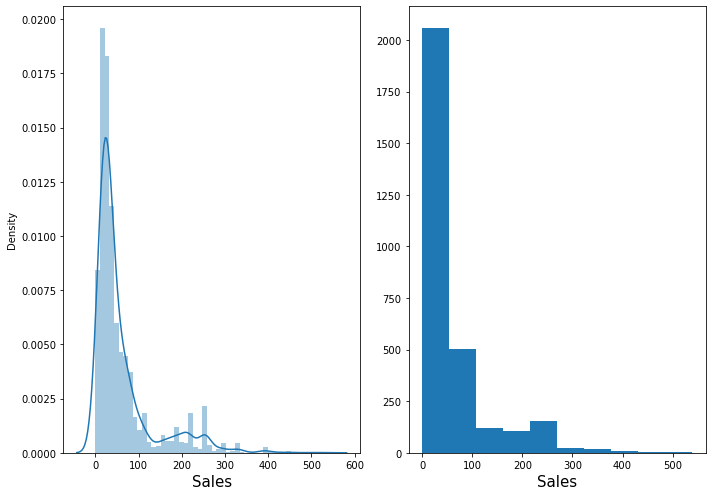

In [131]:
fig, (ax4,ax5)=plt.subplots(1,2,figsize=(10,7))

sns.distplot(harish['Sales'],ax=ax4)
ax4.set_xlabel('Sales', fontsize=15)

ax5.hist(harish['Sales'])
ax5.set_xlabel('Sales', fontsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# COUNTPLOT and BOXPLOT for Agency code

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

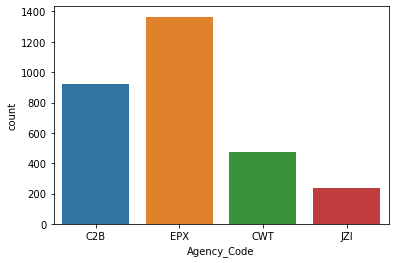

In [132]:
sns.countplot(data = harish, x = 'Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

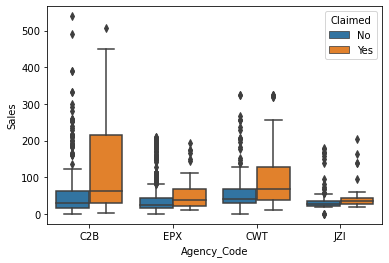

In [133]:
sns.boxplot(data = harish, x='Agency_Code',y='Sales', hue='Claimed')

# COUNTPLOT and BOXPLOT for type

<AxesSubplot:xlabel='Type', ylabel='count'>

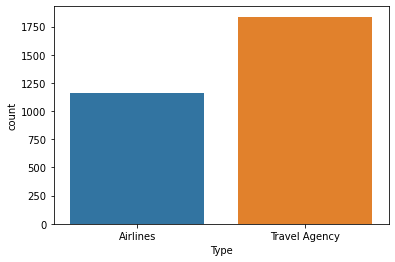

In [134]:
sns.countplot(data = harish, x = 'Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

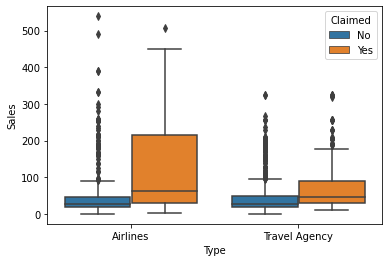

In [135]:
sns.boxplot(data = harish, x='Type',y='Sales', hue='Claimed')

# COUNTPLOT and BOXPLOT for channel

<AxesSubplot:xlabel='Channel', ylabel='count'>

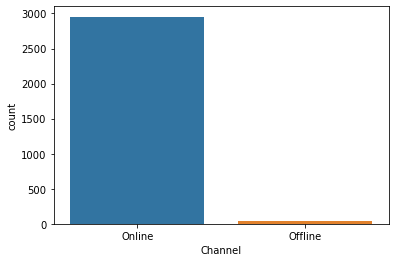

In [136]:
sns.countplot(data = harish, x = 'Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

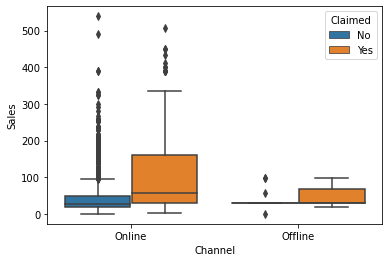

In [137]:
sns.boxplot(data = harish, x='Channel',y='Sales', hue='Claimed')

In [138]:
harish.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# COUNTPLOT and BOXPLOT for product name

<AxesSubplot:xlabel='Product Name', ylabel='count'>

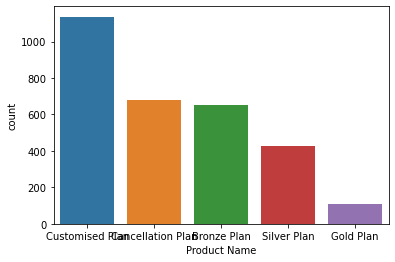

In [139]:
sns.countplot(data = harish, x = 'Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

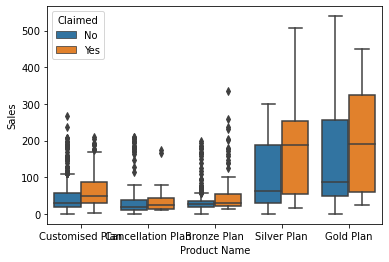

In [140]:
sns.boxplot(data = harish, x='Product Name',y='Sales', hue='Claimed')

In [ ]:
# countplot and boxplot for destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

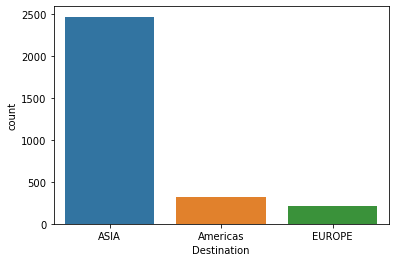

In [141]:
sns.countplot(data = harish, x = 'Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

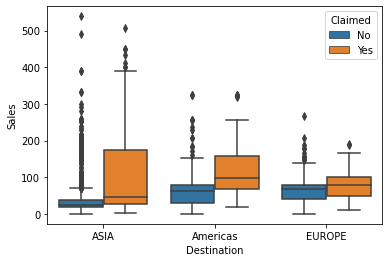

In [142]:
sns.boxplot(data = harish, x='Destination',y='Sales', hue='Claimed')

# Pairplot

<Figure size 720x576 with 0 Axes>

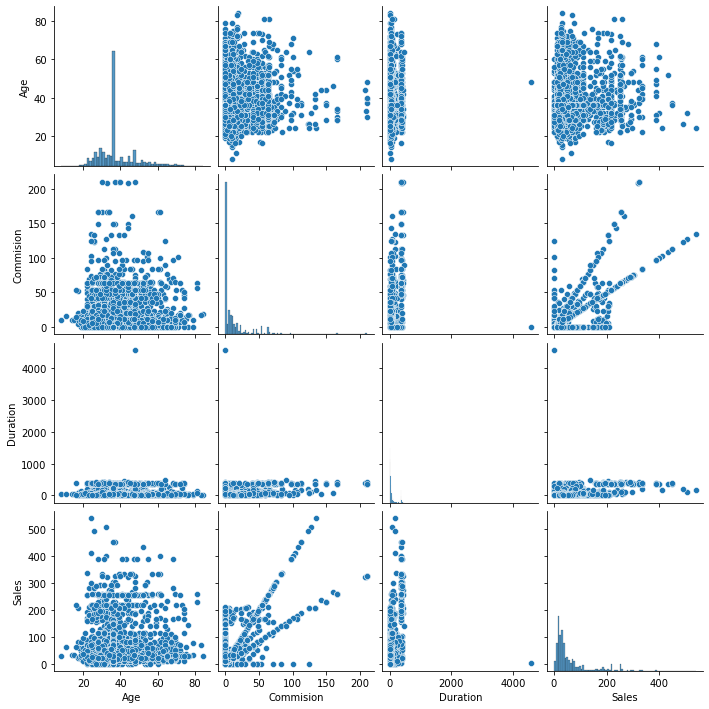

In [143]:
plt.figure(figsize=(10,8))
sns.pairplot(harish)

# heatmap

<AxesSubplot:>

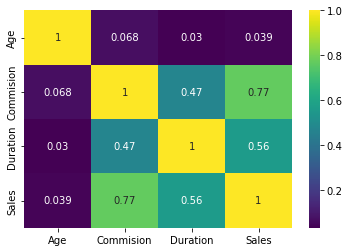

In [144]:
sns.heatmap(harish.corr(), annot=True,cmap="viridis")

In [145]:
harish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# As by seeing the above info we need to convert the object datatype into categorical codes.

In [146]:
for feature in harish.columns: 
    if harish[feature].dtype == 'object': 
        
        print('feature:',feature)
        print(pd.Categorical(harish[feature].unique()))
        print(pd.Categorical(harish[feature].unique()).codes)
        harish[feature] = pd.Categorical(harish[feature]).codes

feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]
feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]
feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]
feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]
feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]
feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [147]:
# after converting the object datatype into categorical code need to check.

In [148]:
harish.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [149]:
harish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [150]:
harish.Claimed.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

# Question 2.2

# Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Extracting the target column into separate vectors for training set and test set

In [151]:
X = harish.drop("Claimed", axis=1)

y = harish.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


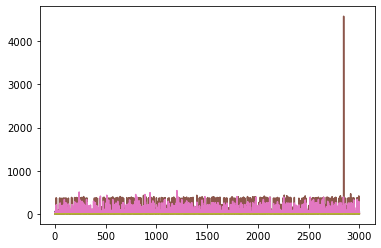

In [152]:
plt.plot(X)
plt.show()

In [153]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


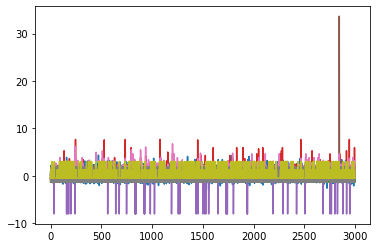

In [154]:
plt.plot(X_scaled)
plt.show()

# Splitting data into training and test set

# As we have already import the important libraries

In [155]:
X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [156]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [158]:

reg_dt_model = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = reg_dt_model, cv = 10)

In [159]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [160]:
reg_dt_model = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = reg_dt_model, cv = 10)

In [161]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [162]:
train_char_label=['No','Yes']
# after that we need to create a dot file in d,c,e any drive eg.
Credit_Tree_File=open('d:\credit_tree.dot','w')
dot_data=tree.export_graphviz(best_grid_dtcl,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=list(train_char_label))
Credit_Tree_File.close()

In [ ]:
# as i have added this file while submitting the project .
# file name -credit_tree
# as we can check this file in webgraphviz.com

# predicting on training and test dataset

In [163]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [164]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.935593,0.064407
2,0.935593,0.064407
3,0.656751,0.343249
4,0.935593,0.064407


# building a random forest classifier

In [165]:
param_grid_rfcl = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,11,15],
    'min_samples_split': [46,50,55],
    'n_estimators': [290,350,400] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)


In [166]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

# predicting training and testing data

In [167]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [168]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.778010,0.221990
1,0.971910,0.028090
2,0.904401,0.095599
3,0.651398,0.348602
4,0.868406,0.131594


# Artificial Neural Network

In [183]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,3000,4000], 
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [170]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [ ]:
# now predicting the training and testing data

In [171]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [172]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


# Question 2.3

# Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# AUC and ROC for training data

AUC: 0.810


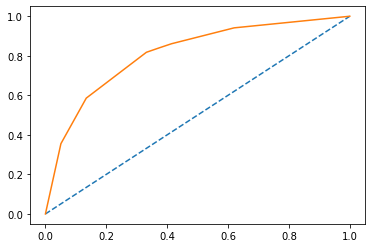

In [173]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)


# AUC and ROC for testing data

AUC: 0.799


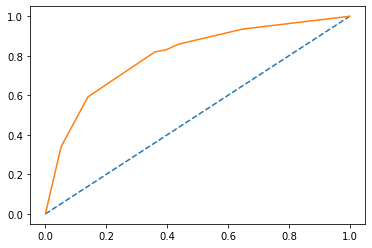

In [174]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# Confusion matrix and classification report for training data

In [175]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [176]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7795238095238095

In [177]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [178]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.59
cart_train_f1  0.62


# Confusion matrix and classification report for testing data

In [179]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]], dtype=int64)

In [180]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels) 
cart_test_acc

0.7777777777777778

In [181]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [182]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_f1=round(df.loc["1"][2],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_precision=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.59
cart_test_f1  0.62


# conclusion for Training

In [ ]:
AUC - 81%
Accuracy - 77%
Precision - 66%
f1-score - 62%

# Conclusion for Testing

In [ ]:
AUC - 80%
Accuracy - 77%
Precision - 83% 
f1-score - 84%

# Training and Test set results are almost similar, and with the overall measures high

# RF model for training data

In [184]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [185]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.72      0.61      0.66       647

    accuracy                           0.80      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [186]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.61
rf_train_f1  0.66


Area under Curve is 0.8563713512840778


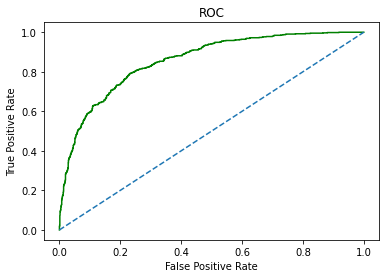

In [187]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# RF model for testing data

In [188]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7844444444444445

In [189]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.78      0.78      0.78       900



In [190]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.56
rf_test_f1  0.62


Area under Curve is 0.8181994657271499


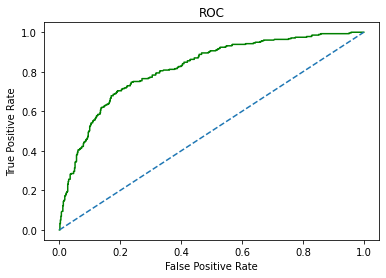

In [191]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# random forest conclusion 

# for training 

In [ ]:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%

# for testing

In [ ]:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62

# NM MODEL For Training data

In [192]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [193]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [194]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


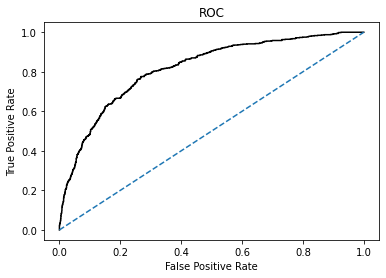

In [195]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# NM model for testing data

In [196]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [197]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [198]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


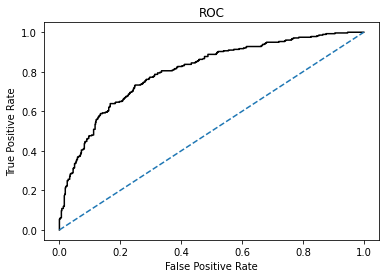

In [199]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

# NM conclusion

# for training
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59
    
# for testing
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%

# Question 2.4



# Final Model: Compare all the models and write an inference which model is best/optimized.

In [200]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.80,0.78,0.78,0.77
AUC,0.81,0.80,0.86,0.82,0.82,0.80
Recall,0.59,0.59,0.61,0.56,0.51,0.50
Precision,0.66,0.65,0.72,0.68,0.68,0.67
F1 Score,0.62,0.62,0.66,0.62,0.59,0.57


# ROC curve for 3 model on training data

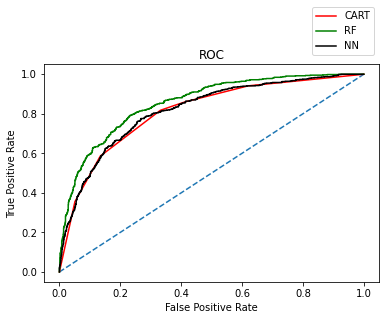

In [201]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC curve for 3 model on testing data

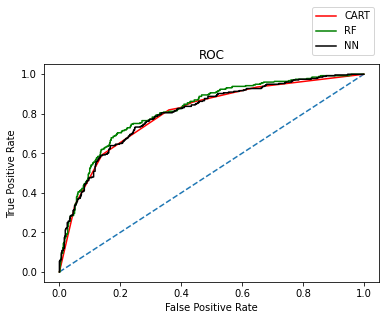

In [202]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# CONCLUSION :
#I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.

# Question 2.5

# Inference: Based on the whole Analysis, what are the business insights and recommendations

# Answer


#This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.
#Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?
#Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.